# CUSTOMER CHURN ANALYSIS 

## PROBLEM STATEMENT:

#### Churn rate also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity.This term is widely use in business industry with regards to contractual base customers.Churn allows to keep a pulse on the company’s growth (or decline). Even a relatively small churn rate can have a major impact on revenue over time.
Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

 #### This Dataset contains data with 7043 rows and 21 Attributes.

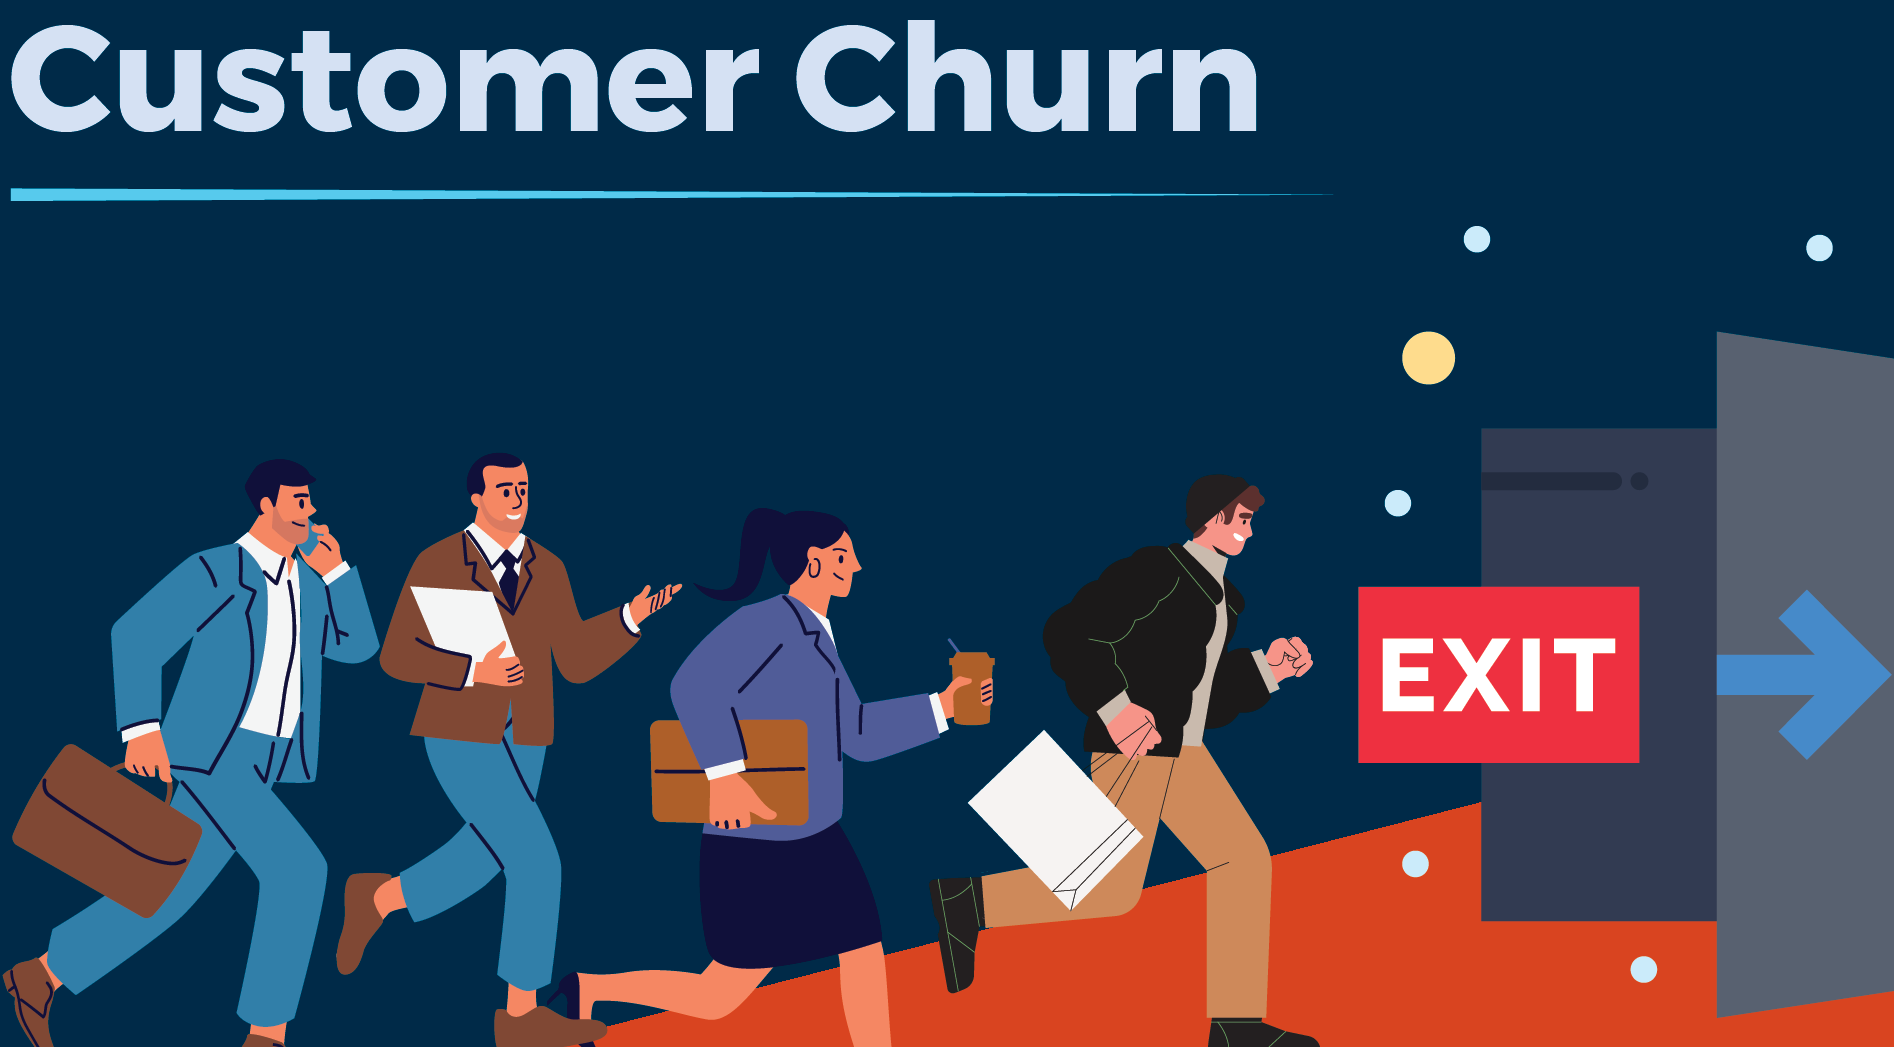

In [1]:
from IPython.display import Image,display
Image(filename =r"C:\Users\nehas\OneDrive\Desktop\CCC.png")

## PROBLEM DEFINITION:-
   - To study the dataset and predicting and detecting the Churn rate by Customer using machine learning techniques.

### Attribute Information :

- customerID

- gender

- SeniorCitizen

- Partner

- Dependents

- tenure

- PhoneService

- MultipleLines

- InternetService

- OnlineSecurity

- OnlineBackup

- DeviceProtection

- TechSupport

- StreamingTV

- StreamingMovies

- Contract

- PaperlessBilling

- PaymentMethod

- MonthlyCharges

- TotalCharges

- Churn

## TARGET VARIABLE :-

`Churn`

'(Churn rate (sometimes called attrition rate), in its broadset sense, is a measure of number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support. The term is used in many cotexts, but is most widely applied in business with respect to contractual customer base, for example in businesses with a subscriber-based service model such as mobile telephone network and pay TV operators. The term is also used to refer to participant turnover in peer-to-peer networks. Churn rate is an input into customer lifetime value modeling, and can be part of a simulator used to measure return on marketing investment using marketing mix modeling.)

## Variable Types -

- Categorial Data :18
- Numerical Data :03
    

## TOOLS USED :

The following tools are going to be used for data analysis;

- Pandas
- Numpy
- Matplotlib
- Seaborn
- Scikit-learn

## IMPORTING NECESSARY LIBRARIES-

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as stl  # generating 2d image 

import warnings
warnings.filterwarnings('ignore')

## LOAD THE DATASET - 

In [3]:
cc = pd.read_csv("Telecom_customer_churn.csv")# to read the data present in csv file
pd.set_option('display.max_columns',None)

cc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### In this dataset,both numerical and categorical data's are present of the customers.Here,Churn is a traget variable as it contains 2 categories(Yes/No) so it will be a "Classification problem".

### DATA EXPLORATION  (EDA) :-

In [4]:
#Checking the dimension of the dataset.

cc.shape

(7043, 21)

#### - There are 7043 rows and 21 attributes in this dataset.

In [5]:
# Checking the bottom 5 rows and columns of the dataset.

cc.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
#Checking the datatypes of the columns.

cc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### - These are the datatypes present in the dataset.There are 3 types of data present - object, float and integer types . Our Target variable is string object which means this problem can be considered as Classification approach.

In [7]:
# check the columns names in the dataset

cc.columns  

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### - These are the names of the 21 columns present in the dataset. Out of 21 columns 20 are independent variables and remaining one is the dependent variable which is our target column.

#### STATISTICAL SUMMARY OF NUMERICAL DATA.

In [8]:
#Statistical summary of Numerical data.

cc.describe()  

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### KEY OBSERVATION FROM ABOVE STATISTICAL SUMMARY -

- The total count in numerical data is same for all the columns (7043).

- The Mean is greater than Median (50th percentile ) in all numerical columns, this indicates that the data is positively skewed.

- There is a large difference in 75th percentile  and max value in all 3 columns i.e 'SeniorCitizen','tenure' and  'MonthlyCharges', which is suggestive of the presence of outliers.

- Standard deviation is less than mean in both 'tenure' and 'MonthlyCharges' columns which shows that the data is dispersed .


In [9]:
# Checking the number of unique values present in each columns 

cc.nunique().to_frame("No of unique values")

,No of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


#### - Our target variable has 2 unique values present in it.

In [10]:
#Checking the unique values in our target variable .

cc.Churn.unique() 

array(['No', 'Yes'], dtype=object)

In [11]:
#Checking the value count present in target variable .

cc.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### - The total value count of churn is divided into 2 parts Yes(1869) and No(5174).

In [12]:
#Checking the information of this data.

cc.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## - KEY OBSERVATIONS -

- There are total count of 7043 entries and 21 columns.
- There is integer,object and float datatypes of variables.
- The second column give us an idea about how big the dataset and how many non-null values are there for each given fields.
- Since the column 'customerID' is used only for identification purpose, we can drop this column as this will not impact building the model.

## DROPING UNNECESSARY COLUMNS FROM THE DATASET .

In [13]:
cc.drop('customerID',axis = 1, inplace = True)

## CHECKING MISSING VALUES IN THE DATASET

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


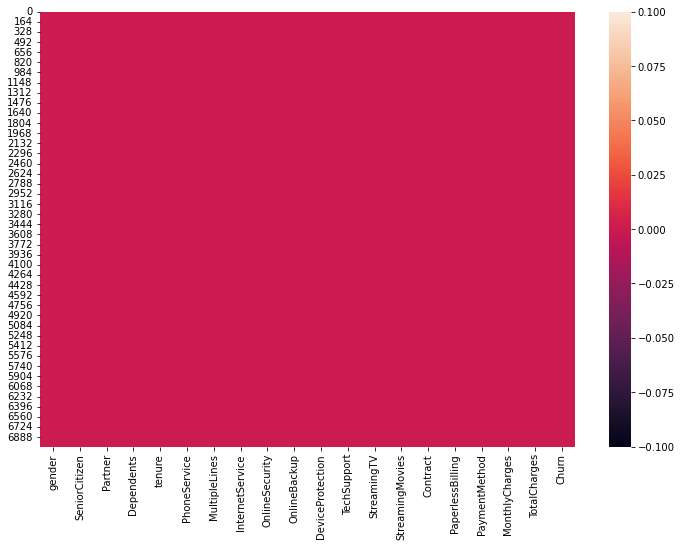

In [14]:
#Checking the missing values in the dataset.

# Visualizing the data using heatmap

plt.figure(figsize=[12,8])
sns.heatmap(cc.isnull())
print(cc.isnull().sum())

#### - There is no Null values present in this dataset.

In [15]:
#checking the value count for each columns -


for i in cc.columns:
    if cc[i].dtypes =='object':
        print(i,'\n',cc[i].unique())
        print('^'*50)

gender 
 ['Female' 'Male']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Partner 
 ['Yes' 'No']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Dependents 
 ['No' 'Yes']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
PhoneService 
 ['No' 'Yes']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
MultipleLines 
 ['No phone service' 'No' 'Yes']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
InternetService 
 ['DSL' 'Fiber optic' 'No']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
OnlineSecurity 
 ['No' 'Yes' 'No internet service']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
OnlineBackup 
 ['Yes' 'No' 'No internet service']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
DeviceProtection 
 ['No' 'Yes' 'No internet service']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TechSupport 
 ['No' 'Yes' 'No internet service']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
StreamingTV 
 ['No' 'Yes' 'No internet service']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

#### - The data in column 'TotalCharges' is continuous in nature, but is reflecting object datatype.Also 11 records of this column has blank data,thereby lets check the unique value of that column and handle it.

In [16]:
cc['TotalCharges'].unique().tolist()  # this will show all the unique values 

['29.85',
 '1889.5',
 '108.15',
 '1840.75',
 '151.65',
 '820.5',
 '1949.4',
 '301.9',
 '3046.05',
 '3487.95',
 '587.45',
 '326.8',
 '5681.1',
 '5036.3',
 '2686.05',
 '7895.15',
 '1022.95',
 '7382.25',
 '528.35',
 '1862.9',
 '39.65',
 '202.25',
 '20.15',
 '3505.1',
 '2970.3',
 '1530.6',
 '4749.15',
 '30.2',
 '6369.45',
 '1093.1',
 '6766.95',
 '181.65',
 '1874.45',
 '20.2',
 '45.25',
 '7251.7',
 '316.9',
 '3548.3',
 '3549.25',
 '1105.4',
 '475.7',
 '4872.35',
 '418.25',
 '4861.45',
 '981.45',
 '3906.7',
 '97',
 '144.15',
 '4217.8',
 '4254.1',
 '3838.75',
 '1426.4',
 '1752.65',
 '633.3',
 '4456.35',
 '1752.55',
 '6311.2',
 '7076.35',
 '894.3',
 '7853.7',
 '4707.1',
 '5450.7',
 '2962',
 '957.1',
 '857.25',
 '244.1',
 '3650.35',
 '2497.2',
 '930.9',
 '887.35',
 '49.05',
 '1090.65',
 '7099',
 '1424.6',
 '177.4',
 '6139.5',
 '2688.85',
 '482.25',
 '2111.3',
 '1216.6',
 '79.35',
 '565.35',
 '496.9',
 '4327.5',
 '973.35',
 '918.75',
 '2215.45',
 '1057',
 '927.1',
 '1009.25',
 '2570.2',
 '74.7',

In [17]:
cc['TotalCharges'].nunique()  # this will show the no/count of unique values 

6531

In [18]:
#Checking the space in TotalCharges columns using name of the column(loc)

cc.loc[cc['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### - In the column ,TotalCharges we can find the columns has spaces as values instead of blank or marking as null in this columns ,lets fill this column with some values.

### REPLACING ' ' IN COLUMN TOTALCHARGES WITH NAN VALUES 

In [19]:
cc['TotalCharges'] = cc['TotalCharges'].replace(' ',np.nan)

In [20]:
# Rechecking null values 

cc.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### - As noticed , now the column TotalCharges has total 11 missing values in it

In [21]:
#Converting the datatype of column to float.

cc['TotalCharges'] = cc['TotalCharges'].astype('float64')

#Imputing mean value of the columns for the null values in the column.

cc['TotalCharges'] = cc['TotalCharges'].fillna(np.mean(cc['TotalCharges']))

In [22]:
# Rechecking null values 

cc.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### - Finally ,we have removed all teh null values present in the dataset.

## DATA VISUALIZATION 

#### UNIVARIATE ANALYSIS 

In [23]:
# Separating numerical and categorical columns

# checking for categorical columns.
cat_var=[]

for i in cc.dtypes.index:
    if cc.dtypes[i]=='object':
        cat_var.append(i)
print("Categorical columns are:\n",cat_var)
print("\n")

# Now checking for numerical columns
num=[]

for i in cc.dtypes.index:
    if cc.dtypes[i]!='object':
        num.append(i)
print("Numerical columns are:\n",num)

Categorical columns are:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical columns are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


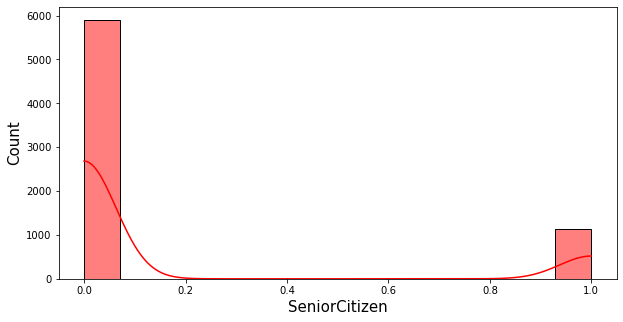

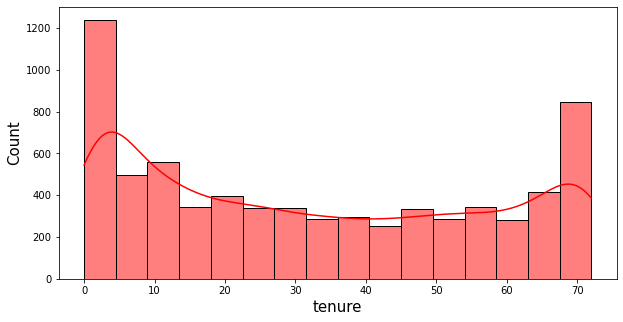

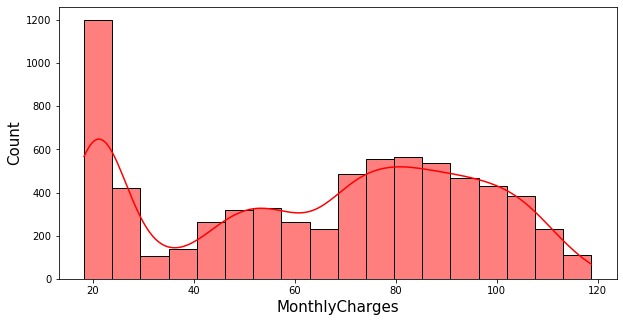

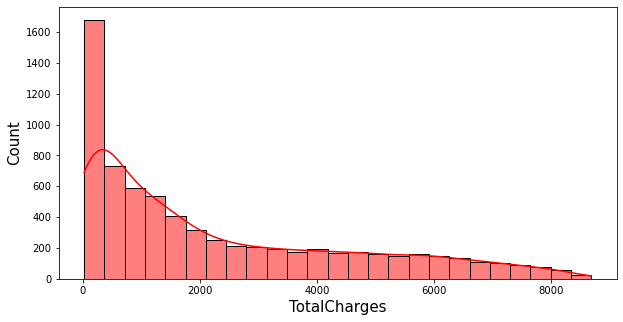

In [24]:
# Visualizing the dataset in histplot for all the columns

for i in num:
    plt.figure(figsize=(10,5))
    sns.histplot(cc,x = i,color='red',kde=True)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Count',fontsize=15)
plt.show()

## KEY OBSERVATIONS -

- From the above histplots, we can notice that the data the columns SeniorCitizen and TotalCharges is skewed to right.
- Other two columns 'tenure' and 'MonthlyCharges' do not have skewness.

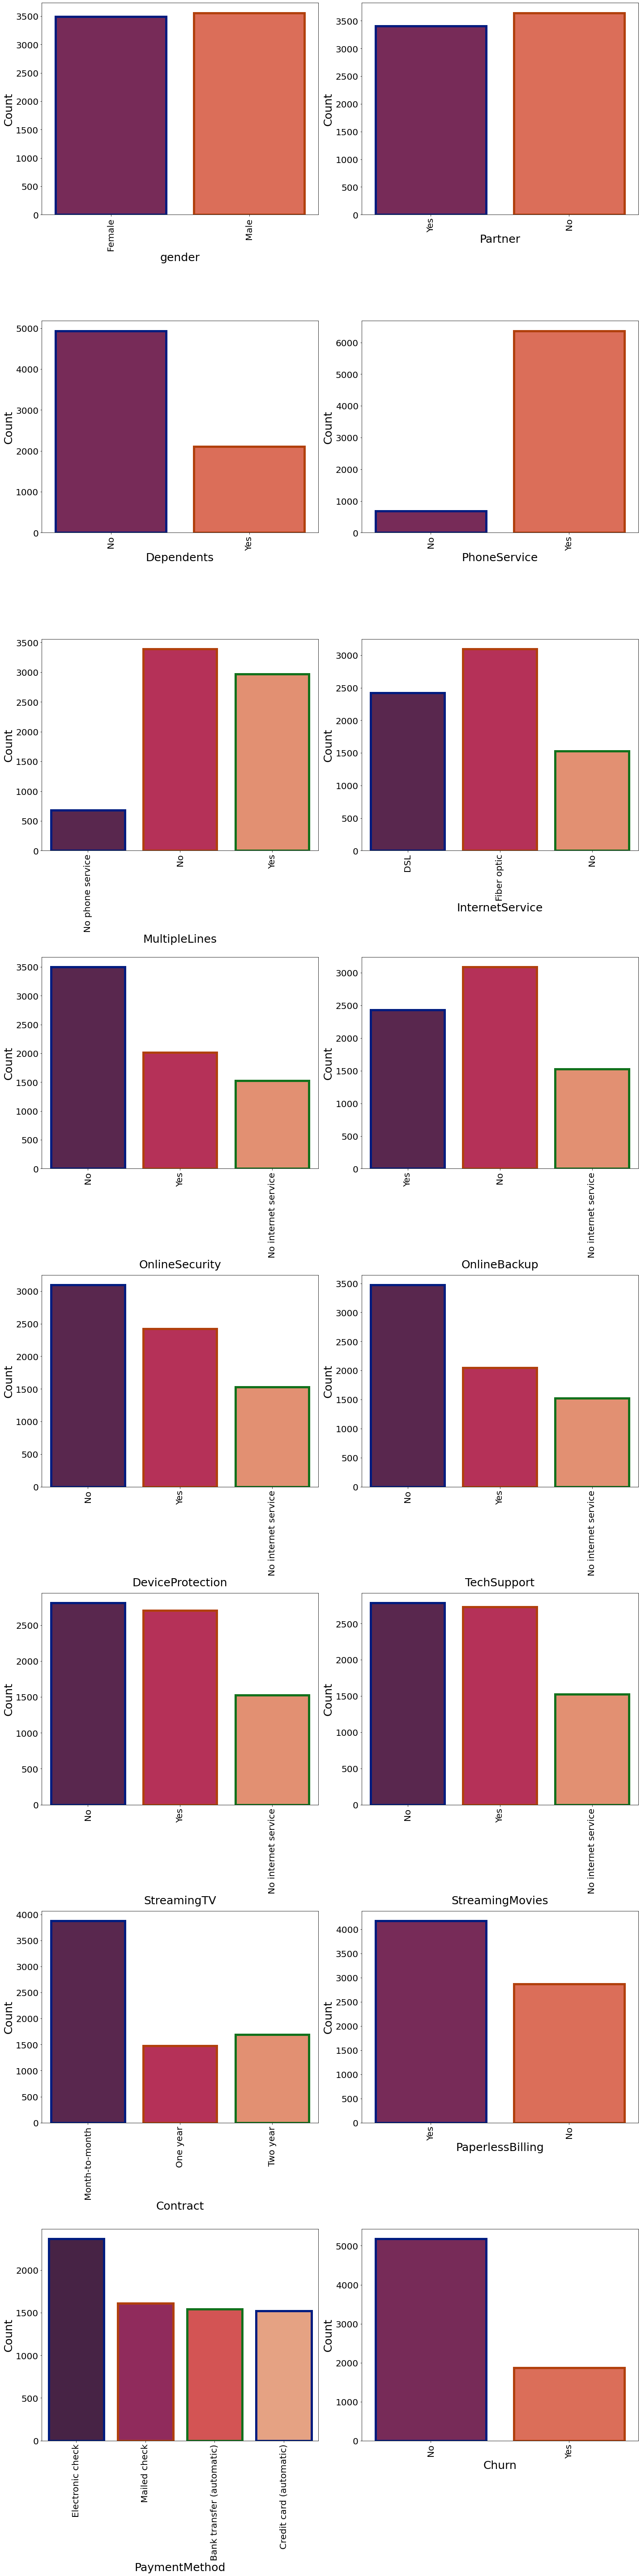

In [25]:
# Visualizing the dataset by using countplot

plt.figure(figsize=(20,80))
cat = 1

for i in cat_var[0:16]:
    if cat <= 16:
        st = plt.subplot(8,2,cat)
        sns.countplot(data=cc,x=i,palette="rocket",linewidth = 5, edgecolor = sns.color_palette("dark", 3))
        plt.xlabel(i,fontsize=25)
        plt.xticks(fontsize=20)
        plt.xticks(rotation= 90)
        plt.yticks(fontsize=20)
        plt.ylabel('Count',fontsize=25)
    
    cat +=1
plt.tight_layout()

## KEY OBSERVATIONS -

- In the column 'Gender', the data is provided for both male and female, but the data for male customers are slightly higher than female customers in the dataset.
-  The number of data for customers who are having and not having partners are almost similar in the dataset but there was noticable increase in data for not having partner data.
-  In dependents ,the customers having no dependents are more in the dataset.
- Similary for phone services ,most of the customers have opted for Phone service.
- In the column , MultipleLines the customer who have phone services from single line have high counts compared to the customers having phone services from multiple lines.
- Most of the customers have chosen to get Fiber optic intenet followed by DSL, but there are many customers who do not get an internet services.
- The customers who have internet services they needs online security and who do not own any internet services, they do not need any online security . But from the count plot we can observe the majority of customers who have internet services but they do not use any online security.
- The customers who do not own internet services and online security, they do not need online backup usage.From the graph, we can see the majority of customers who own internet services but they do not have Online backup and the customers who own internet services have very less online backup .
- Most of the customers without any device protection have high counts as compared to the customers who have some kind of device protection and the customers who do not have internet access they do not need any device protection.
- Also , most of the customers didn't opt for tech support for internet service.
- The customers who do not use streaming TV are a bit high in numbers than the customers who do use Streaming TV and the customers who do not own internet they do not use this service much.
- The customer who do not have Streaming movies are high in count followed by the customers who have Streaming Movies services and the customers who do not have internet services they have less streaming movies services compared to others.
- Most of the customers prefer Month to Month contract compared to 1 year and 2 year contract.
- Most of the customers prefer paperless billing and average number of customers who do not prefer paper less billing they may like to receive paper billing.
- Most of the customers prefer Electronic check payment method and the customers who prefer Mailed check, bank transfer and Credit card have average in count.
- There are more number of customers who have not churned than those who have churn. This leads to class imbalance issue in the data, we will rectify it by using Oversampling method in later part.

## BIVARIATE ANALYSIS 

Analying target variable with feature variables 

<Figure size 720x360 with 0 Axes>

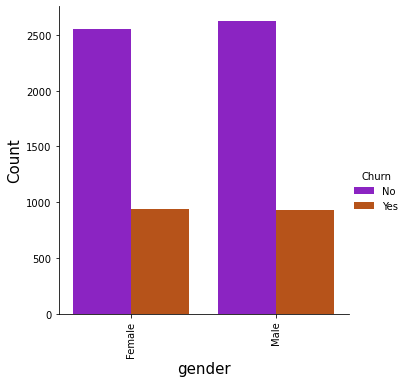

<Figure size 720x360 with 0 Axes>

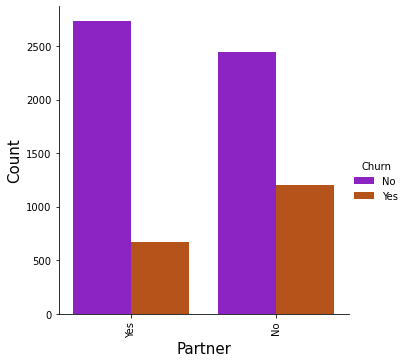

<Figure size 720x360 with 0 Axes>

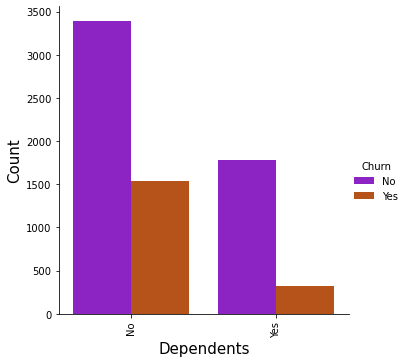

<Figure size 720x360 with 0 Axes>

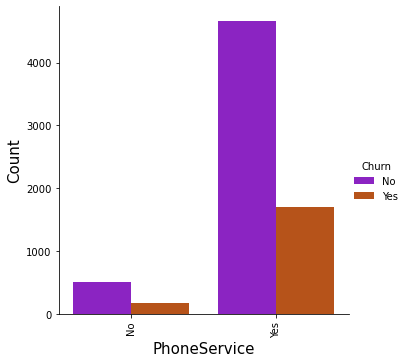

<Figure size 720x360 with 0 Axes>

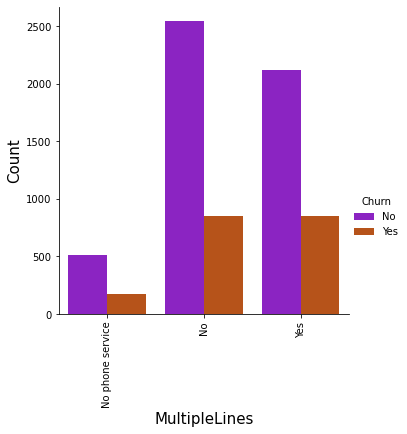

<Figure size 720x360 with 0 Axes>

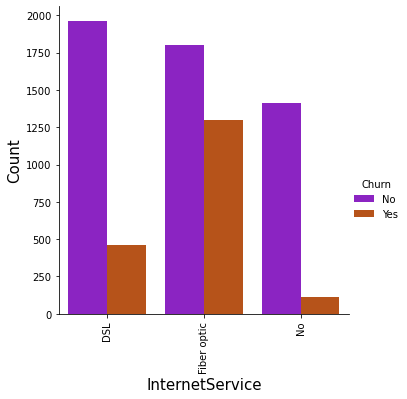

<Figure size 720x360 with 0 Axes>

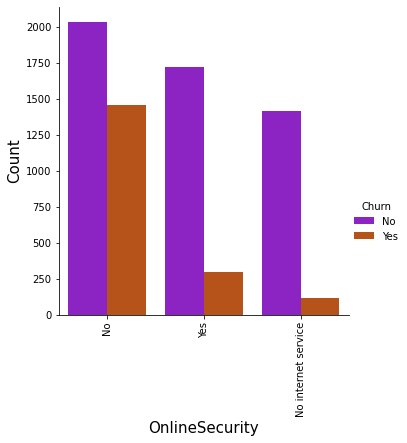

<Figure size 720x360 with 0 Axes>

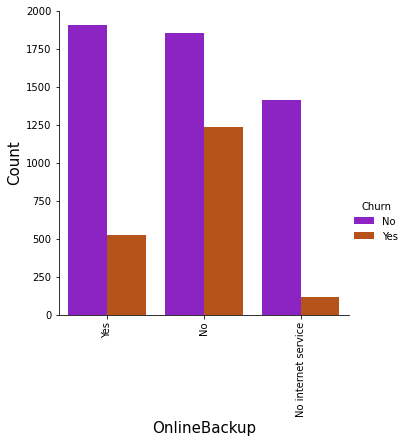

<Figure size 720x360 with 0 Axes>

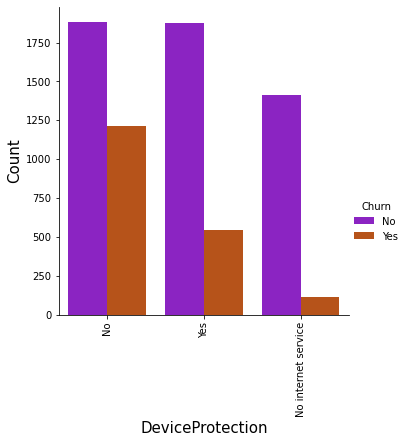

<Figure size 720x360 with 0 Axes>

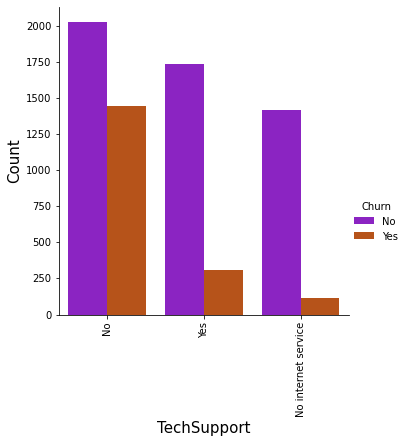

<Figure size 720x360 with 0 Axes>

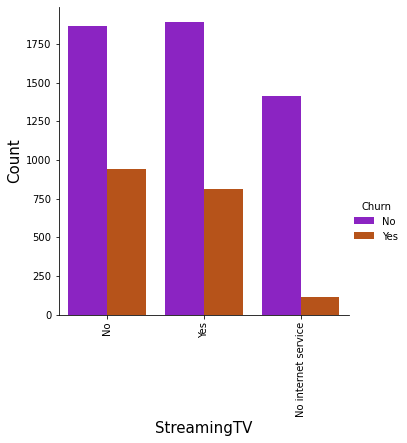

<Figure size 720x360 with 0 Axes>

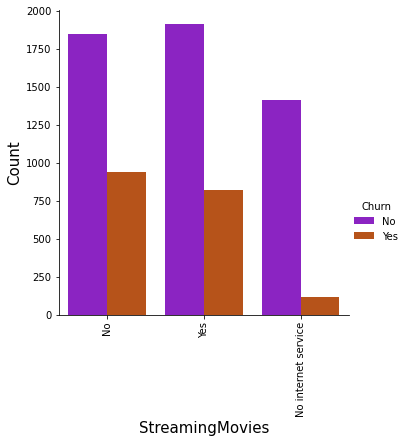

<Figure size 720x360 with 0 Axes>

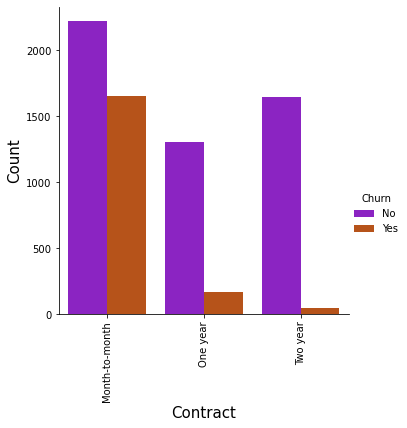

<Figure size 720x360 with 0 Axes>

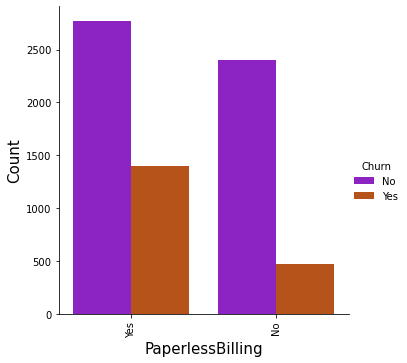

<Figure size 720x360 with 0 Axes>

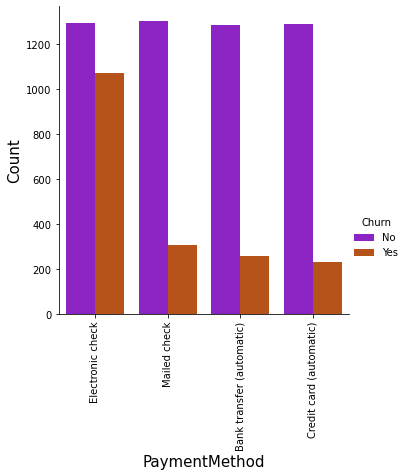

<Figure size 720x360 with 0 Axes>

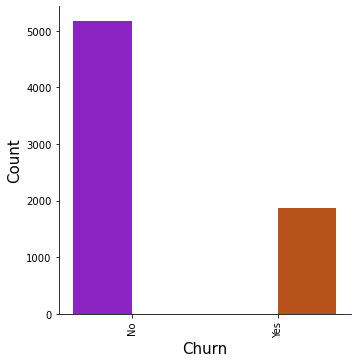

In [26]:
# Visualizing Categorical columns with Target variable

for i in cat_var:
    plt.figure(figsize=(10,5))
    sns.catplot(x=i,hue='Churn',data=cc,palette="gnuplot",kind="count")
    plt.xticks(rotation=90)
    plt.xticks(rotation=90)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Count',fontsize=15)
plt.show()

## KEY OBSERVATIONS-
- From the above observation , we noticed that there is no significance difference in the genders, both the genders have equal churn level.
- In Second plot,we can see the customers without partners have high churn rate compared to the customers with partners.
- The customers who do not have any dependency have high churn rate compared to the customers who have dependents.
- In the column phone service , we can notice the customers who have phone service have high tendency of getting churned.
- The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines.
- The ratio of churn is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad and need to be focuse on and the customers who own DSL service they have very less churn rate.
- The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned.
- It is also same as in the case of online security. It is obvious that the customers having who do not have internet services they do not need any online backup.The customers who do not have online backup services they have high churn rate.
- The customers who do not own any Device protection have very high churn rate compared to others.
- The customers who do not have any techsupport then they have high churn ratio.
- The churn rate is nearly same if the customer own StreamingTV or not.
- The customers who are existing in the company they do not own StreamingMovies in their devices. And the churn rate is low when the customer do not have internet services.
- The customer who have churend are mostely having month to month contract.
- The customers who prefer paperless billing they have high churn rate.
- The customers who prefer Electronic check have high churn rate also the customers who existing in the company uses equal payment method.

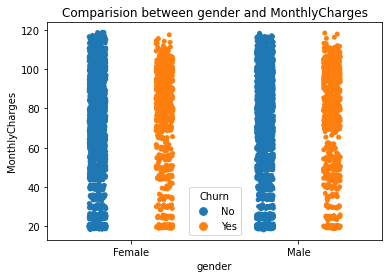

In [27]:
# comparing gender and MonthlyCharges
plt.title("Comparision between gender and MonthlyCharges")
sns.stripplot(x="gender",y="MonthlyCharges",data=cc,hue="Churn",split=True)
plt.show()

#### Both male and female customers with monthly charges above 60 have high chances of getting churned.

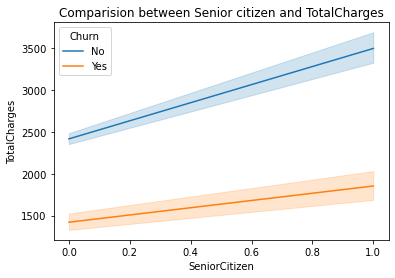

In [28]:
plt.title("Comparision between Senior citizen and TotalCharges")
sns.lineplot('SeniorCitizen','TotalCharges', data = cc, hue ='Churn' )
plt.show()

#### From the above observations, the total charges for the service is higher for the senior citizens.

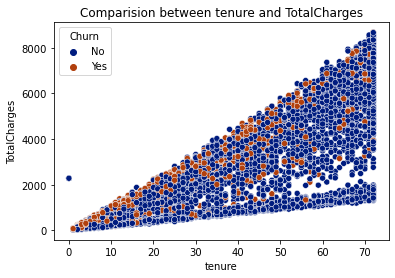

In [29]:
# comparing tenure and TotalCharges

plt.title("Comparision between tenure and TotalCharges")
sns.scatterplot(x="tenure",y="TotalCharges",data=cc,hue="Churn",palette="dark")
plt.show()

#### As the tenure increases, TotalCharges also increases rapidly .if the customers have low tenure services then there is high chance of churn.

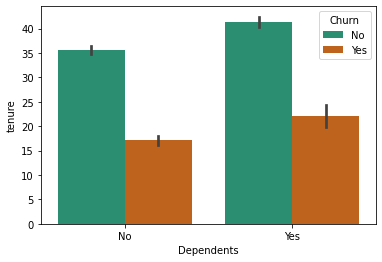

In [30]:
# checking Churn level in tenure
sns.barplot(x='Dependents',y='tenure',data=cc,palette="Dark2",hue="Churn")
plt.show()

#### The customers who have dependents with high tenure, then the churned level is high 80-110.

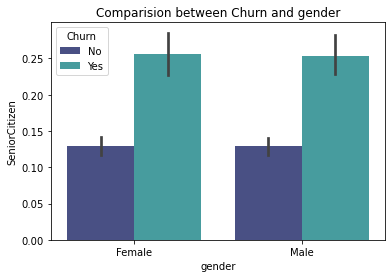

In [31]:
# comparing gender and SeniorCitizen on the basis of churn
plt.title("Comparision between Churn and gender")
sns.barplot(x="gender",y="SeniorCitizen",data=cc,hue="Churn",palette="mako")
plt.show()

#### There is no significant difference between the columns. The customer's churns remains unaffected in gender and SeniorCitizen case

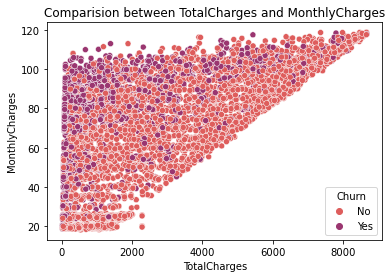

In [32]:
# comparing  TotalCharges and MonthlyCharges
plt.title("Comparision between TotalCharges and MonthlyCharges")
sns.scatterplot(x="TotalCharges",y="MonthlyCharges",data=cc,hue="Churn",palette="flare")
plt.show()

#### There is a linear relation between the features .The customers with high monthly charges have high tendancy to stop the services since they have high total charges.Also the if the customers ready to contribute with the monthly charges then there is an increament in the total charges.

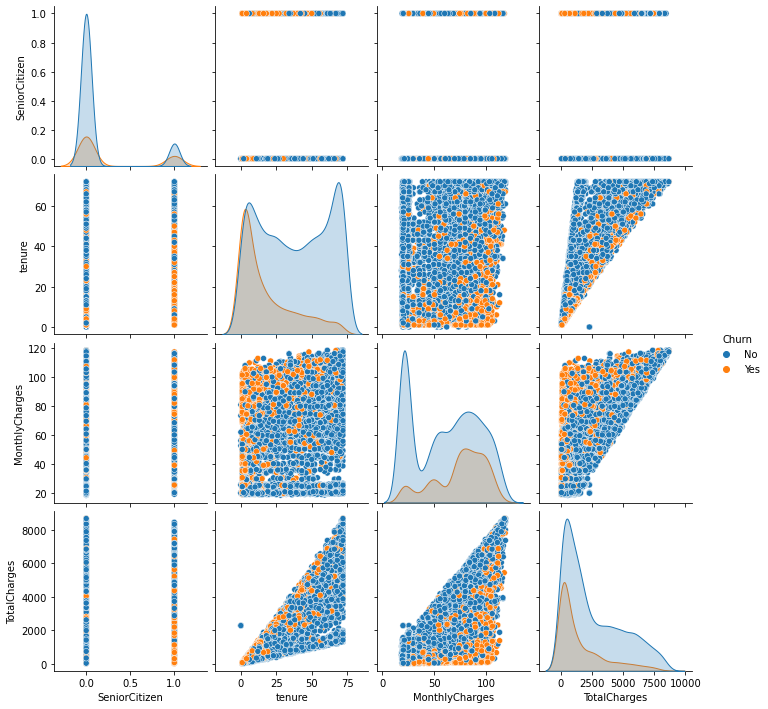

In [33]:
sns.pairplot(cc,hue="Churn")
plt.show()

## KEY OBSERVATIONS -

- This is a pairwise distribution between the features , on the basis of the target variable 'Churn'.
- There is strong linear relationship between 'tenure' and 'TotalCharges','MonthlyCharges' and 'TotalCharges'
- There is no outliers present in any of teh numerical columns.

## STATISTICAL SUMMARY 

In [34]:
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## KEY OBSERVATIONS -
- There is equal number of count present in all the columns .
- The  column 'SenionrCitizen'  is categorical in nature and doesnt serve much significance . 
- The mean value is higher than the median for the columns 'tenure', 'TotalCharges'. That means the data is skewed.

## ENCODING CATEGORICAL DATA 

In [35]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()  

In [36]:
# loop over all the columns where dtypes is object then print the columns name and there unique values -

for col in cc.select_dtypes(include=['object']).columns:
    print(f"{col}:{cc[col].unique()}")

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [37]:
for i in cc.columns:
    if cc[i].dtypes == "object":
        cc[i] = oe.fit_transform(cc[i].values.reshape(-1,1))
cc.head()     

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


#### - Finally , we have encoded the categorical data .

## CORRELATION MATRIX

<AxesSubplot:>

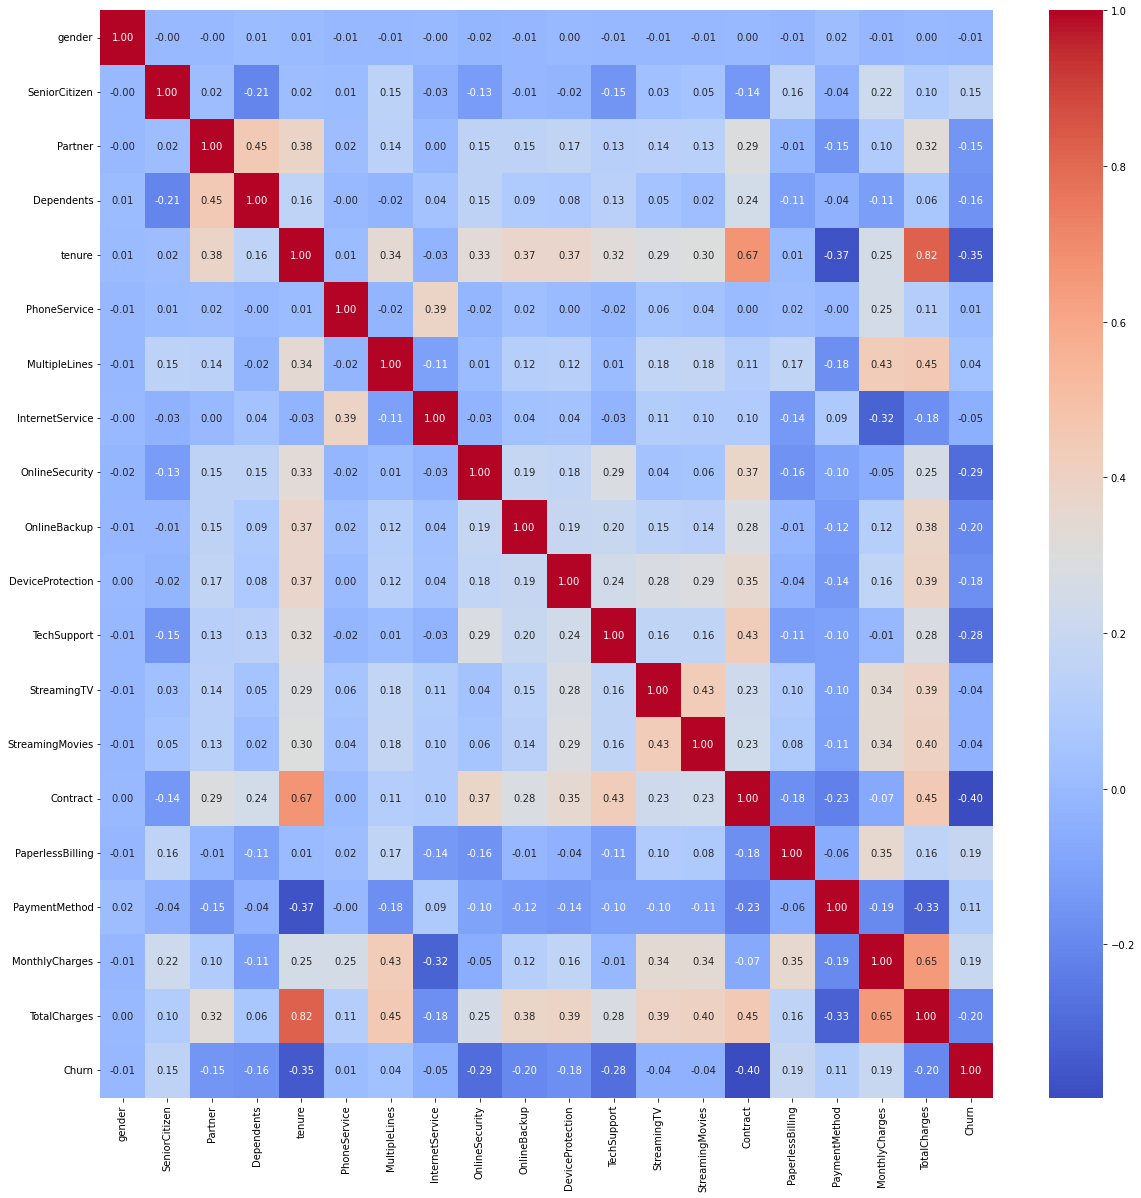

In [38]:
Correlation = cc.corr()
Correlation

#Plotting the correlation of columns
plt.figure(figsize=[20,20])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='coolwarm')

## Correlation with the Target column(Churn)

MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


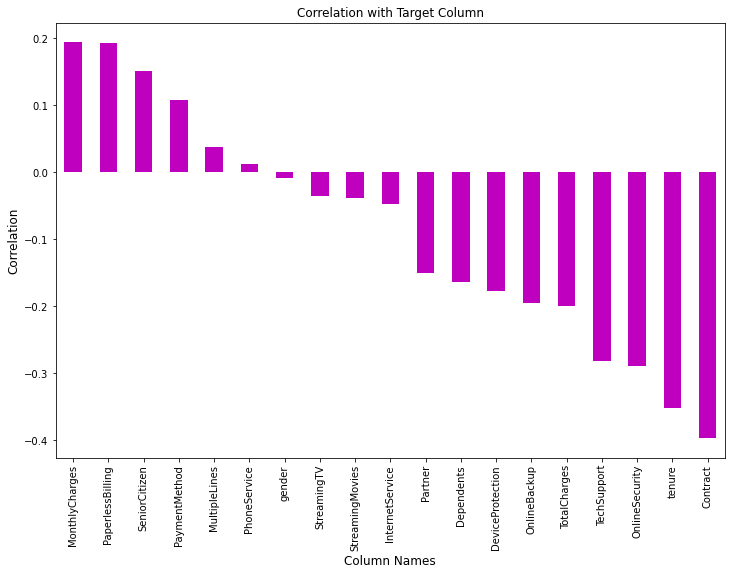

In [39]:
print(Correlation['Churn'].drop('Churn').sort_values(ascending = False))
plt.figure(figsize = [12,8])
Correlation['Churn'].sort_values(ascending= False).drop('Churn').plot(kind = 'bar', color ='m')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

## KEY OBSERVATIONS-

- The column 'MonthlyCharges' is having highest postive correlation to the target variable 'Churn' and the column 'Contract' is having highest negative correlation to the target variable 'Churn'.

- The columns 'MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen', 'PaymentMethod', 'MultipleLines', 'PhoneServices' are having positive correlation to the target variable, 'Churn'. Rest of the columns are having negative correlation to the target variable 'Churn'.

- The column 'PhoneService' is having least positive correlation to the target variable 'Churn. While the column 'gender' is having least negative correlation to the target variable 'Churn'.

## DATA DISTRIBUTION (Checking skewness of data)

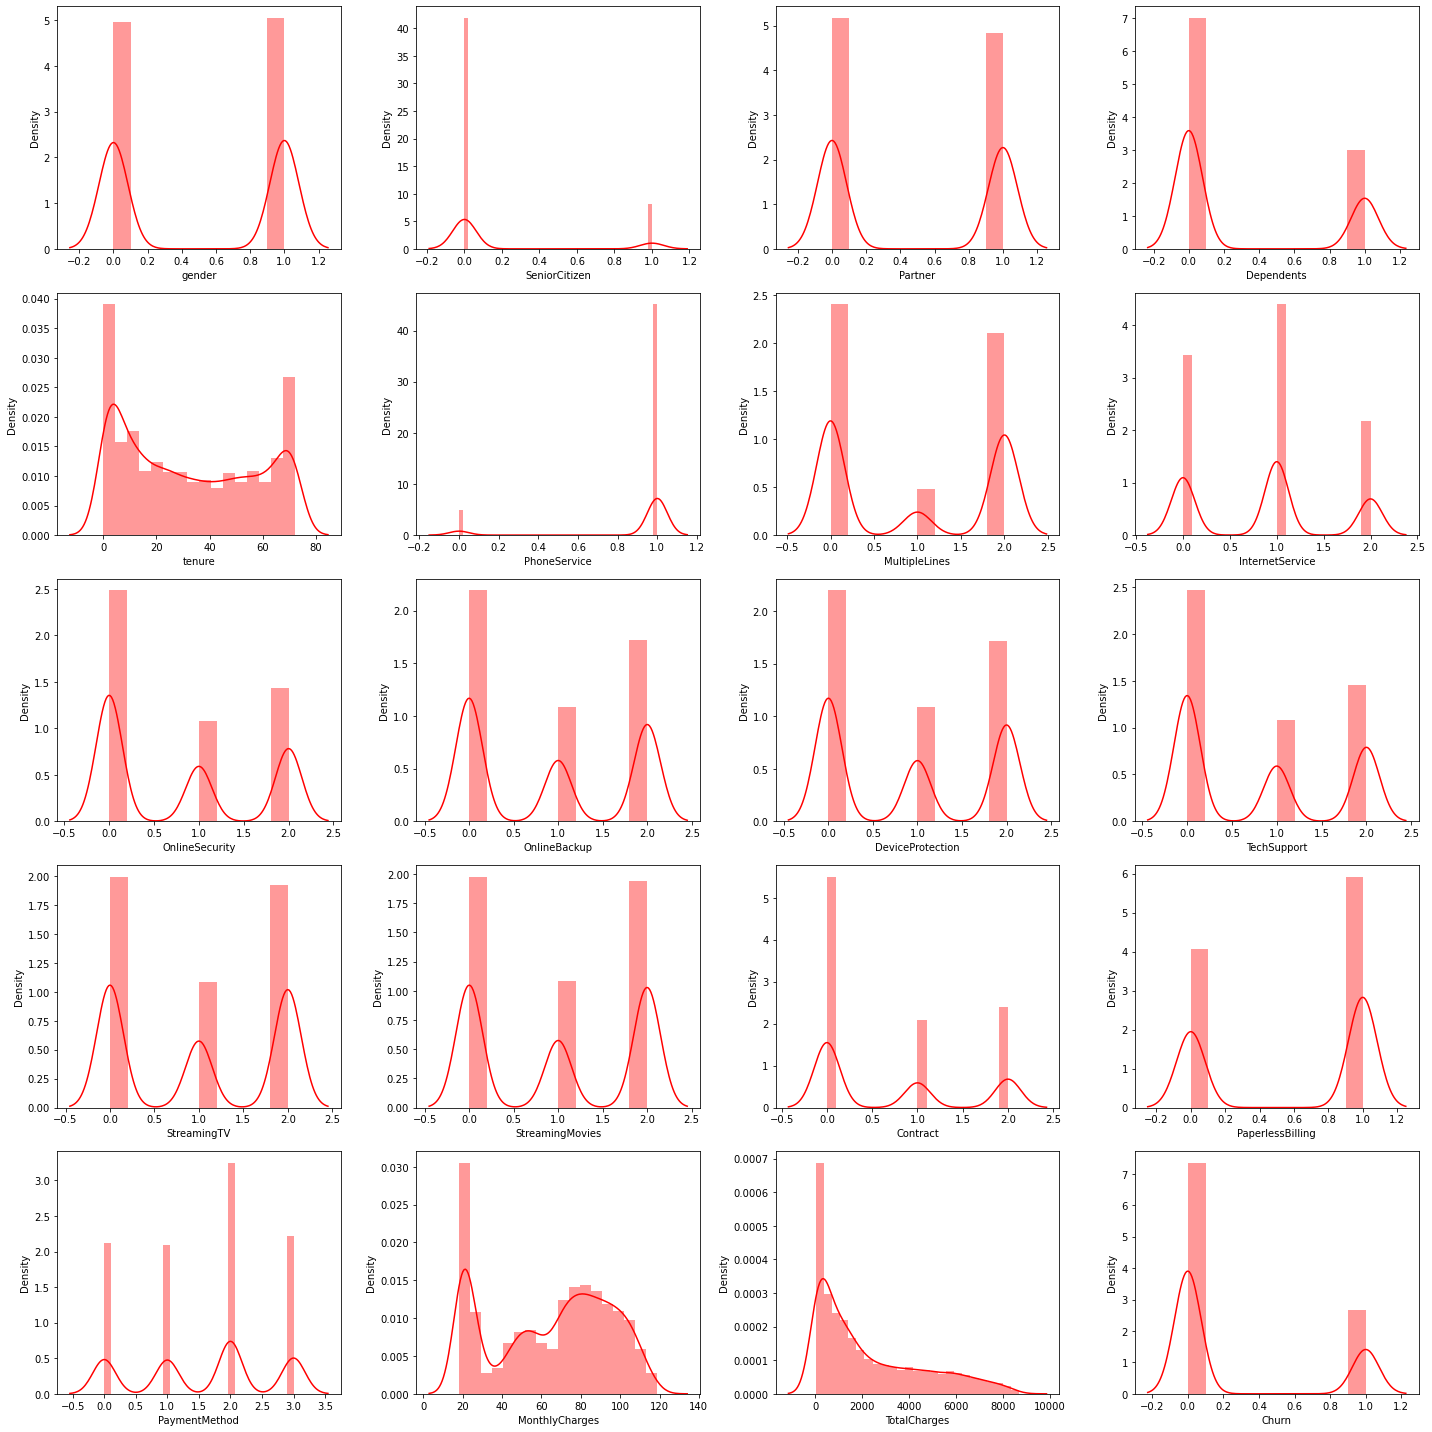

In [40]:
plt.figure(figsize=(20,20))
plot=1
for col in cc.columns:
    if plot<=20:
        plt.subplot(5,4,plot)
        sns.distplot(cc[col],color='red')
        plt.xlabel(col)
        plot=plot+1
plt.tight_layout()

#### As observed , none of the columns are having normally distributed data. Skewness and variations are present in almost all the data.

## HANDLING SKEWNESS

In [41]:
skewness= cc.skew()
skewness.sort_values(ascending=False)

SeniorCitizen       1.833633
Churn               1.063031
TotalCharges        0.962394
Dependents          0.875199
Contract            0.630959
OnlineSecurity      0.416985
TechSupport         0.402365
tenure              0.239540
InternetService     0.205423
DeviceProtection    0.186847
OnlineBackup        0.182930
MultipleLines       0.118719
Partner             0.067922
StreamingTV         0.028486
StreamingMovies     0.014657
gender             -0.019031
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
PaperlessBilling   -0.375396
PhoneService       -2.727153
dtype: float64

#### - From the above observations, thc columns 'SeniorCitizen','Churn','TotalCharges','Dependents','Contract'and 'Phone service' are the data where skewness is present beyond standard limits which also includes some categorical data.

## DETECTING OUTLIERS

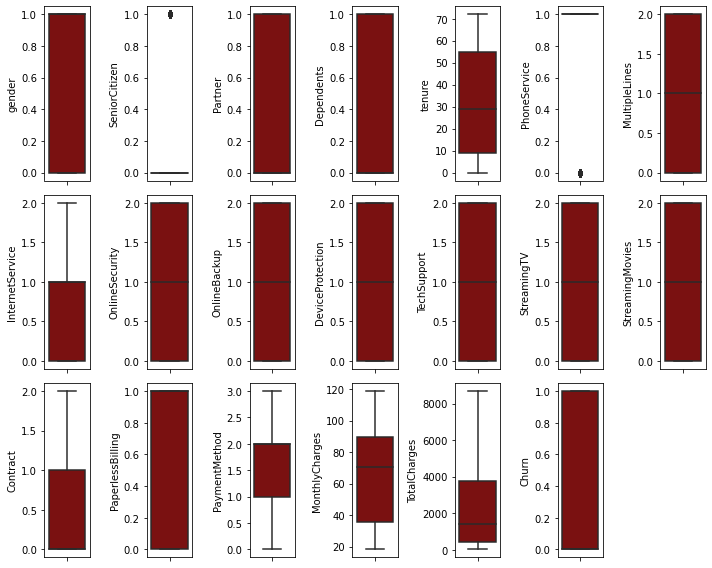

In [42]:
#Plotting the data of every columns with boxplot to check the outliers.

plt.figure(figsize = [10,8])
for i in range(0,len(cc.columns.values)):
    plt.subplot(3,7,i+1)
    sns.boxplot(y = cc[cc.columns.values[i]],color='darkred')
    plt.tight_layout()

#### - This shows that  the columns 'SeniorCitizen' and 'PhoneService' are showing presence of outliers in data. The column Senior Citizen contains categorical data so no need to remove outliers from it.

## DATA CLEANING ( REMOVING SKEWNESS FROM THE DATA)

(7043, 19)
(7043,)
0.0    5174
1.0    1869
Name: Churn, dtype: int64


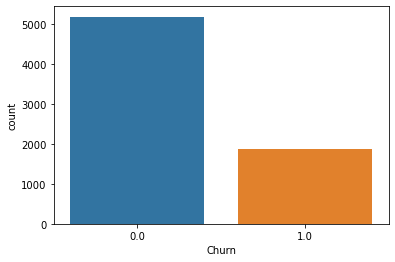

In [43]:
#Splitting the data into 'x' and 'y' labels-

x=cc.drop('Churn',axis=1)
y=cc['Churn']

print(x.shape)
print(y.shape)

sns.countplot(y)
print(y.value_counts())

#### The data is imbalanced as the  customers who are not churn is more in the dataset than churn. So let's balance the data using SMOTE technique.

In [44]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X,Y=sm.fit_resample(x,y)
Y

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
10343    1.0
10344    1.0
10345    1.0
10346    1.0
10347    1.0
Name: Churn, Length: 10348, dtype: float64

0.0    5174
1.0    5174
Name: Churn, dtype: int64


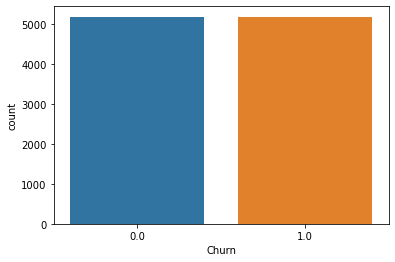

In [45]:
sns.countplot(Y)
print(Y.value_counts())

#### - Now the data looks balanced . so we are good to proceed further.

In [46]:
print(X.shape)
print(Y.shape)

(10348, 19)
(10348,)


In [47]:
x = X.copy()
y = Y.copy()
print(x.shape)
print(y.shape)

(10348, 19)
(10348,)


### REMOVING SKEWNESS -

In [48]:
#We can set the skewness standard limit as +/-0.5.

x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

SeniorCitizen       2.103030
Dependents          1.106679
TotalCharges        1.104817
Contract            1.092684
OnlineSecurity      0.718544
TechSupport         0.681712
tenure              0.502794
PaperlessBilling   -0.625650
PhoneService       -2.881140
dtype: float64

#### - These the features where skewness is present.

#### Since SeniorCitizen,Dependent,Contract, OnlineSecurity,TechSupport,Partner and phone service  is categorical in nature , so we won't remove skewness from it.Therefore , we can remove from numerical columns such as tenure and Total Charges .

In [49]:
from sklearn.preprocessing import power_transform

def skew(col):
    x[col]=power_transform((x[col].values.reshape(-1,1)))
    
skew('tenure')
skew('TotalCharges')


In [50]:
x.skew()

gender             -0.008457
SeniorCitizen       2.103030
Partner             0.244609
Dependents          1.106679
tenure             -0.163345
PhoneService       -2.881140
MultipleLines       0.055717
InternetService     0.184587
OnlineSecurity      0.718544
OnlineBackup        0.377079
DeviceProtection    0.372074
TechSupport         0.681712
StreamingTV         0.047910
StreamingMovies     0.042035
Contract            1.092684
PaperlessBilling   -0.625650
PaymentMethod      -0.319485
MonthlyCharges     -0.428706
TotalCharges       -0.126564
dtype: float64

####  Since TotalCharges is continuous in nature, let's use cube root method to remove skewness. We have removed the skewness using cube root method.

## Removing the Outliers


#### - Since the numerical columns didnt had any outliers present in them .Therefore , we don't have to remove any outliers as such.Also we can't remove the outliers which shown for the categorical variables..

## Checking the Multicolinearity

In [51]:
print(x.shape)
print(y.shape)
z = x.columns

(10348, 19)
(10348,)


In [52]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = z)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.055983,-0.399624,1.180911,-0.610560,-1.534992,-3.261527,0.029806,-1.295986,-0.799525,1.391202,-0.948175,-0.813511,-1.106294,-1.111565,-0.675097,0.762511,0.371063,-1.338212,-1.737411
1,1.046859,-0.399624,-0.924617,-0.610560,0.542029,0.319264,-1.056868,-1.295986,1.654420,-0.946162,1.385991,-0.813511,-1.106294,-1.111565,0.637922,-1.411628,1.394604,-0.395048,0.392277
2,1.046859,-0.399624,-0.924617,-0.610560,-1.333953,0.319264,-1.056868,-1.295986,1.654420,1.391202,-0.948175,-0.813511,-1.106294,-1.111565,-0.675097,0.762511,1.394604,-0.502938,-1.262856
3,1.046859,-0.399624,-0.924617,-0.610560,0.844820,-3.261527,0.029806,-1.295986,1.654420,-0.946162,1.385991,1.624870,-1.106294,-1.111565,0.637922,-1.411628,-1.676019,-0.904913,0.372283
4,-1.055983,-0.399624,-0.924617,-0.610560,-1.333953,0.319264,-1.056868,0.207361,-0.799525,-0.946162,-0.948175,-0.813511,-1.106294,-1.111565,-0.675097,0.762511,0.371063,0.083495,-1.114728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1.046859,-0.399624,-0.924617,1.560333,0.918271,0.319264,1.116480,0.207361,-0.799525,-0.746272,-0.748559,1.416341,1.160617,1.159785,0.637922,0.762511,-1.588486,1.140477,1.231980
10344,-1.055983,-0.399624,-0.924617,-0.610560,0.479894,0.319264,1.116480,0.207361,-0.325433,-0.494593,-0.497224,-0.813511,-1.106294,0.720970,-0.675097,0.342477,0.173319,0.579897,0.693922
10345,-1.055983,-0.399624,0.725372,-0.610560,0.894152,0.319264,1.116480,0.207361,1.123499,1.391202,0.880985,-0.285958,1.160617,-1.111565,-0.675097,0.762511,0.371063,1.031861,1.126659
10346,0.483429,-0.399624,0.616761,1.127289,-0.204386,0.319264,1.116480,0.207361,-0.799525,-0.319895,-0.948175,-0.813511,-1.106294,-1.111565,-0.675097,0.762511,-1.127529,0.274894,0.004954


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [54]:
vif(x)

,Column Name,VIF Factor
0,gender,1.002880
1,SeniorCitizen,1.095178
2,Partner,1.480223
3,Dependents,1.375991
4,tenure,46.394690
5,PhoneService,1.696813
6,MultipleLines,1.440771
7,InternetService,1.862310
8,OnlineSecurity,1.308377
9,OnlineBackup,1.223471


#### As we can see that the column 'TotalCharges' is having high variance inflation factor. So let's try dropping this column from the dataset and calculate the vif again.

In [55]:
x1 = x.drop('TotalCharges', axis = 1).copy()

In [56]:
vif(x1)

,Column Name,VIF Factor
0,gender,1.002845
1,SeniorCitizen,1.095161
2,Partner,1.479841
3,Dependents,1.374978
4,tenure,2.522336
5,PhoneService,1.695848
6,MultipleLines,1.436747
7,InternetService,1.705227
8,OnlineSecurity,1.303410
9,OnlineBackup,1.219698


#### The multicolinearity of the columns have been removed as all the columns have VIF less than 10 which means the data is free from multicolinearity problem and now the data is preprocessed for model building.

## MODEL BUILDING 

In [57]:
# SPLITTING THE DATA INTO X AND Y VARIABLE.

x = x1.copy()
y = y.copy()
print(x.shape)
print(y.shape)

(10348, 18)
(10348,)


In [58]:
# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

# for cross validation
from sklearn.model_selection import cross_val_score

#Matrics for Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_curve,roc_auc_score

In [59]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
xgbc = XGBClassifier()

#### FINDING BEST RANDOM STATE-

In [60]:
maxAcc = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state = i)
   
    rfc.fit(x_train,y_train)
    pred = rfc.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8690821256038648 on random_state: 24


In [61]:
#Applying the best selected random state -

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state = 24)

### 1)RANDOM FOREST CLASSIFIER 

In [62]:
# checking accuracy for Random Forest Classifier

rfc.fit(x_train,y_train)

# Prediction
predrf = rfc.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))
      

0.8599033816425121
[[912 128]
 [162 868]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1040
         1.0       0.87      0.84      0.86      1030

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



#### We have created the Random Forest Classifier model and geting the accuracy for this model is 87.4%

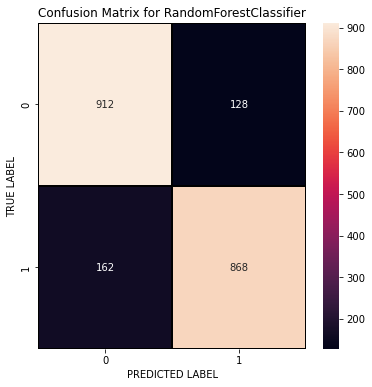

In [63]:
# let's plot confusion matrix for Random Forest Classifier

cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor="black", fmt = ".0f", ax = ax,xticklabels = x_axis_labels,yticklabels = y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for RandomForestClassifier")
plt.show()

## 2) LOGISTIC REGRESSION

In [64]:
# checking accuracy for logistic regression

lr.fit(x_train,y_train)

# Prediction
predlr = lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))
      

0.785024154589372
[[779 261]
 [184 846]]
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78      1040
         1.0       0.76      0.82      0.79      1030

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.78      2070
weighted avg       0.79      0.79      0.78      2070



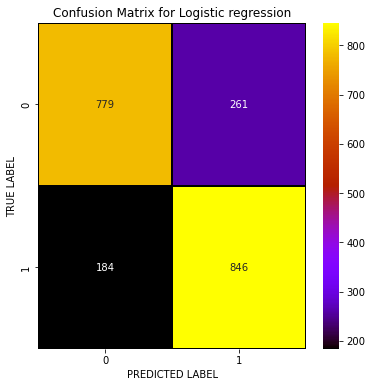

In [65]:
# let's plot confusion matrix for logistic regression.

cm = confusion_matrix(y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor="black", fmt = ".0f",cmap="gnuplot", ax = ax,xticklabels = x_axis_labels,yticklabels = y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Logistic regression")
plt.show()

#### The Logistic regression is giving accuracy of 77.3% .With the help of confusion matrix ,we can able observe the true positive rate, false positive rate, true negative rate and false negative rate and is plotted predicted value against true value.

## 3) SUPPORT VECTOR CLASSIFIER

In [66]:
# checking accuracy for Support Vector Classifier

svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))
      

0.8429951690821256
[[846 194]
 [131 899]]
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      1040
         1.0       0.82      0.87      0.85      1030

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



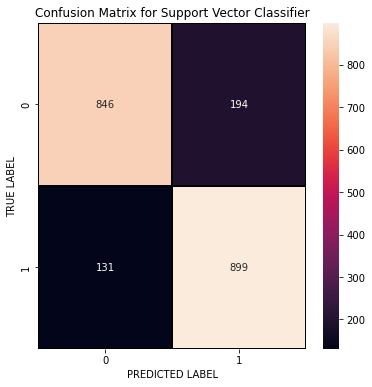

In [67]:
# let's plot confusion matrix for Support Vector Classifier

cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Support Vector Classifier")
plt.show()

#### The support vector classifier is giving accuracy of 66%.

## 4) Knn CLASSIFIER

In [68]:
# checking accuracy for knn Classifier

knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))
      

0.7913043478260869
[[723 317]
 [115 915]]
              precision    recall  f1-score   support

         0.0       0.86      0.70      0.77      1040
         1.0       0.74      0.89      0.81      1030

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070



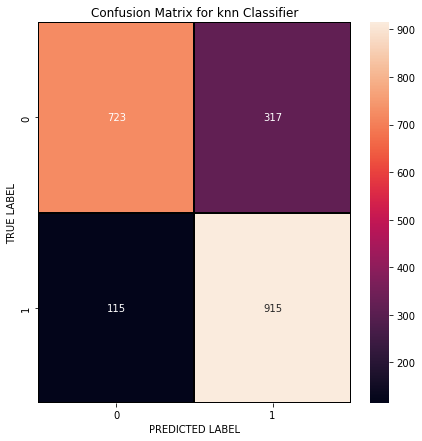

In [69]:
# let's plot confusion matrix for knn Classifier

cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for knn Classifier")
plt.show()

#### - Knn classifier giving the accuracy of 79 %.

## 5) GRADIENT BOOSTING CLASSIFIER

In [70]:
# checking accuracy for Gradient Boosting Classifier

gbc.fit(x_train,y_train)

# Prediction
predGB = gbc.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))
      

0.8632850241545894
[[888 152]
 [131 899]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1040
         1.0       0.86      0.87      0.86      1030

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



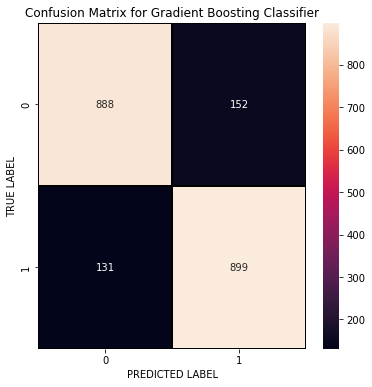

In [71]:
# let's plot confusion matrix for Gradient Boosting Classifier

cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

#### - The Gradient Boosting classifier giving teh accuracy of 87%.

## 6) DECISION TREE CLASSIFIER

In [72]:
# checking accuracy for Decision tree Classifier

dtc.fit(x_train,y_train)

# Prediction
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))
      

0.8178743961352657
[[844 196]
 [181 849]]
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82      1040
         1.0       0.81      0.82      0.82      1030

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



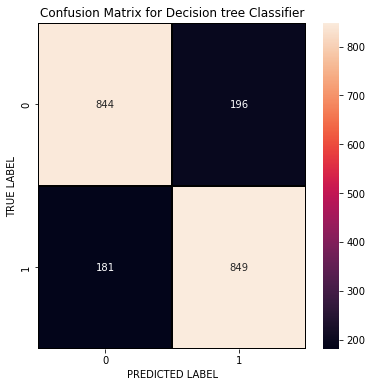

In [73]:
# let's plot confusion matrix for Decision tree Classifier

cm = confusion_matrix(y_test,preddtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Decision tree Classifier")
plt.show()

#### The Decision tree classifier giving the accuracy of 82%.

## 7) ADA BOOST CLASSIFIER 

In [74]:
# checking accuracy for Ada Boost Classifier

abc.fit(x_train,y_train)

# Prediction
predabc = abc.predict(x_test)

print(accuracy_score(y_test, predabc))
print(confusion_matrix(y_test, predabc))
print(classification_report(y_test, predabc))
      

0.866183574879227
[[877 163]
 [114 916]]
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1040
         1.0       0.85      0.89      0.87      1030

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



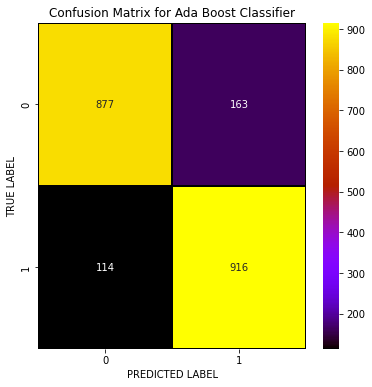

In [75]:
# let's plot confusion matrix for Ada Boost Classifier.

cm = confusion_matrix(y_test,predabc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Ada Boost Classifier")
plt.show()

#### - The AdaBoostClassifier is giving the accuracy of 86%.

## 8) EXTRA TREE CLASSIFIER 

In [76]:
# checking accuracy for ExtraTrees Classifier

etc.fit(x_train,y_train)

# Prediction
predXT = etc.predict(x_test)

print(accuracy_score(y_test, predXT))
print(confusion_matrix(y_test, predXT))
print(classification_report(y_test, predXT))
      

0.863768115942029
[[913 127]
 [155 875]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1040
         1.0       0.87      0.85      0.86      1030

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



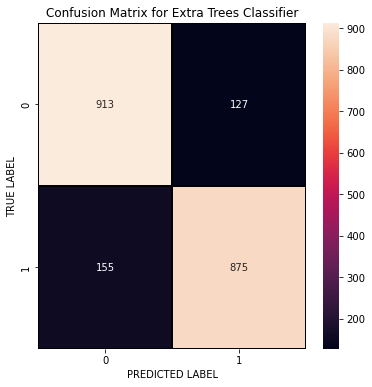

In [77]:
# let's plot confusion matrix for ExtraTrees Classifier
cm = confusion_matrix(y_test,predXT)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Extra Trees Classifier")
plt.show()

#### - Finally ,Created ExtraTrees Classifier model and getting accuracy for this model is 87%

## 9) XGB CLASSIFIER 

In [78]:
# checking accuracy for xgb Classifier

xgbc.fit(x_train,y_train)

# Prediction
predxgb = xgbc.predict(x_test)

print(accuracy_score(y_test, predxgb))
print(confusion_matrix(y_test, predxgb))
print(classification_report(y_test, predxgb))
      

0.8690821256038648
[[905 135]
 [136 894]]
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1040
         1.0       0.87      0.87      0.87      1030

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



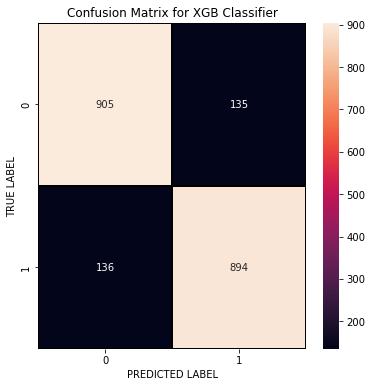

In [79]:
# let's plot confusion matrix for XGB Classifier

cm = confusion_matrix(y_test,predxgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for XGB Classifier")
plt.show()

## CROSS VALIDATION 

In [80]:
# cv score for Random Forest Classifier

print(cross_val_score(rfc,x,y,cv=5).mean())

0.8337055171463728


In [81]:
# cv score for Logistic Regression .

print(cross_val_score(lr ,x,y,cv=5).mean())

0.7690413581673801


In [82]:
# cv score for Support Vector Classifier

print(cross_val_score(svc ,x,y,cv=5).mean())

0.8222954915324682


In [83]:
# cv score for knn Classifier

print(cross_val_score(knn ,x,y,cv=5).mean())

0.78266790883598


In [84]:
# cv score for Gradient Boosting Classifier

print(cross_val_score(gbc,x,y,cv=5).mean())

0.839114744222862


In [85]:
# cv score for Ada Boost Classifier
print(cross_val_score(abc ,x,y,cv=5).mean())

0.8331209037015246


In [86]:
# cv score for Decision Trees Classifier
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7939843981666328


In [87]:
# cv score for Extra Trees Classifier
print(cross_val_score(etc,x,y,cv=5).mean())

0.8378592192545582


In [88]:
# cv score for XGB  Classifier
print(cross_val_score(xgbc,x,y,cv=5).mean())

0.8325461902527067


### After testing and cross valiations, Most of the model gives the highest accuracy such as the Ada boost Classifier, Extra Tree Classifer and XGB classifier.These models is performing well and providing the best accuracy score of maximum 87 % with a cross validation mean score of 83% for 5 cross validations. So we can do the hyperparameter tunning of all the 3 models and see which fits best for the model to perform well.

## HYPERPARAMETER TUNNING OF ADA BOOST CLASSIFIER-

In [91]:
abc.get_params_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [101]:
param={'algorithm' : ['SAMME.R','SAMME'],
    'n_estimators':[25,50,100],
    'learning_rate':[0.1,0.5,1.0]}

ada=GridSearchCV(abc,param,cv=5)
ada.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [25, 50, 100]})

In [102]:
ada.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}

In [103]:
ada.best_score_

0.8503251747741436

#### FINAL MODEL FOR PREDICTION 

In [107]:
Final_model = AdaBoostClassifier(algorithm ='SAMME.R',learning_rate=1.0,n_estimators= 100)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.32850241545894


#### MODEL PERFORMANCE -

Text(37.32000000000001, 0.5, 'predicted label')

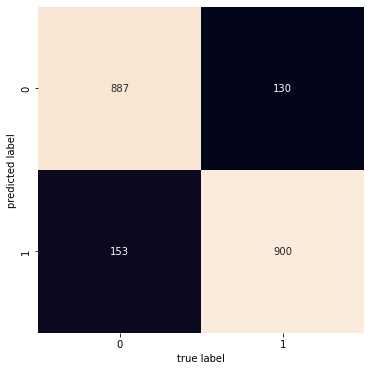

In [108]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test,pred)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#### - After doing the hyperparameter tunning of Ada Boost Classifier ,the accuracy score didn't improved much. So , we will go and check the the hyperparameter tunning of XGB Clssifier.

## HYPERPARAMETER TUNNING OF XGB CLASSIFIER

In [89]:
parameters = {'booster':['gbtree','dart'],
             'eta': [0.3,0.4,0.5],
             'max_depth': [4,5,6],
             'sampling_method':['uniform','subsample']}

grid = GridSearchCV(estimator = XGBClassifier(),param_grid=parameters, cv = 5)

In [90]:
grid.fit(x,y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [92]:
grid.best_score_

0.832642061440683

In [93]:
grid.best_params_

{'booster': 'gbtree', 'eta': 0.4, 'max_depth': 4, 'sampling_method': 'uniform'}

In [125]:
xgbc = XGBClassifier(booster = 'gbtree',eta = 0.4, max_depth = 4 ,sampling_method = 'uniform')
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.20, random_state = 24 )

xgbc.fit(x_train, y_train)
pred_test = xgbc.predict(x_test)
print("Accuracy Score is ",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))
cv_score = cross_val_score(xgbc,x,y, cv = 5)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

Accuracy Score is  0.8652173913043478
[[908 132]
 [147 883]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      1040
         1.0       0.87      0.86      0.86      1030

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070

CV score is  0.832642061440683


#### MODEL PERFORMANCE -

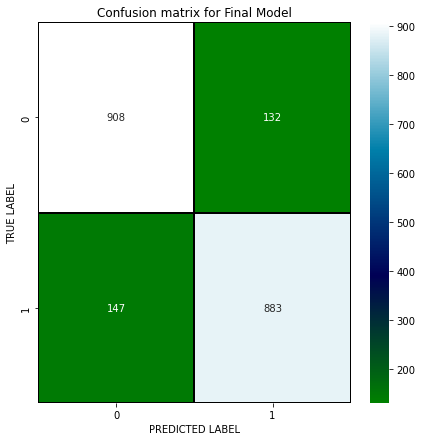

In [95]:
# let's plot confusion matrix for FinalModel
cm = confusion_matrix(y_test,pred_test)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion matrix for Final Model")
plt.show()


#### After hyper parameter tuning the XGB Classifier , the model didnt improved the accuracy score . Lets do hyperaparameter tunning of Extra tree classifier to check whether the accuracy improves or not.

## HYPERPARAMETER TUNNING OF EXTRA TREE CLASSIFIER.

In [109]:
param = {'criterion' : ['gini','entropy'],
              'random_state' : [10,50,1000],
              'max_depth' : [0,10,20],
              'n_jobs' : [-2,-1,1],
              'n_estimators' : [50,100,200,300]}

In [110]:
grid_search = GridSearchCV (etc,param_grid=param,cv=5)
grid_search.fit(x_train,y_train)

print("Best_Params:",grid_search.best_params_)

Best_Params: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300, 'n_jobs': -2, 'random_state': 10}


In [111]:
etc =grid_search.best_estimator_ 
etc.fit(x_train,y_train)
y_pred=etc.predict(x_test)

etc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat: ','\n',etc_conf_mat)

print('Accuracy of Extra tree Classifier After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

con_mat:  
 [[900 140]
 [123 907]]
Accuracy of Extra tree Classifier After Hyperparameter Tuning==>  87.29468599033817


In [126]:
cv_score = cross_val_score(etc,x,y, cv = 5)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

CV score is  0.8421089326450033


#### MODEL PERFORMANCE -

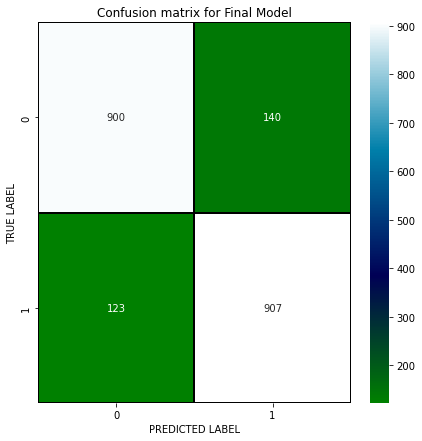

In [112]:
# let's plot confusion matrix for FinalModel
cm = confusion_matrix(y_test,y_pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion matrix for Final Model")
plt.show()


### After testing and cross valiations, the Ada boost Classifier and XGB classifier accracy score didnt improved much and remained the same .Whereas , Extra Tree Classifier models is performing very well  and providing the best accuracy score of maximum 87.2 % with a cross validation mean score of 84.2% for 5 cross validations. Lets further do the AUC_ROC Curve to check which model is performing best.

## Plotting ROC and compare AUC for all the models .

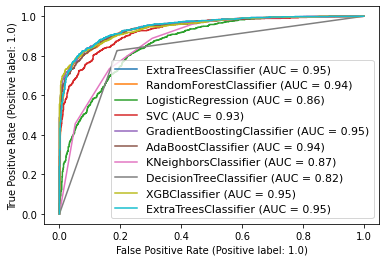

In [114]:
# plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection

disp = plot_roc_curve(etc,x_test,y_test)     # ax_ = Axes with confusion matrix
plot_roc_curve(rfc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gbc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(abc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(xgbc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(etc, x_test, y_test, ax=disp.ax_)


plt.legend(prop={'size':11}, loc='lower right')
plt.show()


#### - This is the Area under curve for each model used here.

In [119]:
# let's check the AUC for the best model after hyper parameter tuning 
def auc_roc(model):
    y_predprob = model.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_predprob)
    auc_score = roc_auc_score(y_test, model.predict(x_test))
    plt.plot([0,1],[0,1],'k--',color='navy',lw=3)
    plt.plot(fpr, tpr, color= 'darkorange',lw=5,label = 'AUC ='+str(round(auc_score,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title(model)
    plt.show()

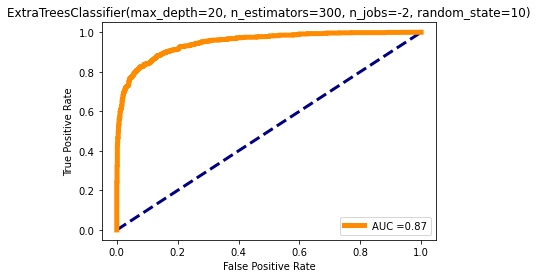

In [121]:
auc_roc(etc)

### The Extra Tree Classifier is providing highest AUC score of 87% and the model is performing well with all the tests, cross validations and tunings and giving the final accuracy score of 87.29% .Thereby ,we will consider the Extra Tree Classifier model as the best performing model.

## Saving the Best Model

In [122]:
import pickle

filename = 'Telecom customer churn prediction model.pkl'
pickle.dump(etc,open(filename,'wb'))

## CONCLUSION -

In [124]:
original = np.array(y_test)
predicted = np.round(np.array(rfc.predict(x_test)),0)
churnprediction = pd.DataFrame({'Original Churn':original,'Predicted Churn':predicted})
churnprediction.sample(10)

,Original Churn,Predicted Churn
1693,1.0,1.0
1938,0.0,0.0
67,0.0,0.0
1432,1.0,1.0
1518,0.0,0.0
185,0.0,0.0
1668,0.0,0.0
736,0.0,0.0
1434,1.0,1.0
205,1.0,1.0


### Our model is performing well with predictions without any errors with an accuracy score of 87.29 %. Now this model can be used to predict whether a customer will be churn or not using the following informaiton about the customer.

## *********************COMPLETED*************************